### Zadanie 3.
Zastosuj algorytm PBIL do rozwiązywania uproszczonego problemu klasyfikacji wielospektralnych obrazów satelitarnych w następujący sposób:
- Dany jest obraz wielospektralny o 3 spektrach i rozmiarze 106 x 148 punktów (zapisany w formacie BSQ, pliki ImageRaw.bsq i ImageRaw.hdr). Każdy punkt obrazu można przedstawić jako wektor rozmiaru 3 x 1, a więc cały obraz można przedstawić jako macierz rozmiaru 3 x 15688 (zapisana w pliku ImageRaw.txt). Dana jest wzorcowa klasyfikacja tego obrazu - jest to bitmapa o 11 kolorach i rozmiarze 106 x 148 punktów (zapisana w pliku ImageExpert.bmp). Można przedstawić ją jako wektor rozmiaru 1 x 15688 o wartościach ze zbioru {1, 2, ..., 11} (zapisany w pliku ImageExpert.txt).
- Interesują nas tylko 3 klasy punktów (klasa nr 3, 7 i 9), pozostałe punkty więc usuwamy z danych, otrzymując macierz X rozmiaru 3 x 9350 (punkty obrazu wielospektralnego) oraz wektor C rozmiaru 1 x 9350 o wartościach ze zbioru {1, 2, 3} (wzorcowa klasyfikacja). Dane te zapisane są odpowiednio w plikach ImageRawReduced.txt i ImageExpertReduced.txt.
  
- Dostępnych jest 266 utworzonych wcześniej reguł klasyfikujących. Każda reguła to określona funkcja, która na wejściu dostaje punkt obrazu (wektor rozmiaru 3 x 1), a na wyjściu zwraca etykietę klasy (liczbę ze zbioru {1, 2, 3}). Dla wygody dostępne są już policzone wartości każdej reguły klasyfikującej dla każdego punktu obrazu, a nie same definicje tych reguł (plik ClassificationRules.txt).
- Klasyfikacja oparta na pojedynczej regule klasyfikującej nie daje dobrych wyników, podobnie jak i klasyfikacja oparta na wszystkich 266 regułach klasyfikujących ("większością głosów”). Dobre wyniki natomiast uzyskuje się, jeśli najpierw wybierze się pewien podzbiór zbioru wszystkich reguł klasyfikujących, a później opiera się decyzję na "większości głosów” reguł z tego podzbioru.
- Do wyznaczenia takiego podzbioru użyj algorytmu PBIL. Przestrzenią poszukiwań będzie zbiór wszystkich wektorów binarnych długości d = 266 (kolejne pozycje odpowiadają kolejnym regułom klasyfikującym: 1 oznacza włączenie, a 0 nie włączanie danej reguły do konstruowanego zbioru). Funkcją celu będzie liczba poprawnie poklasyfikowanych punktów obrazu przez klasyfikator oparty na danym podzbiorze reguł klasyfikujących.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import scipy.stats as sstats

from PBIL import PBIL

In [2]:
# X = open('data/ImageRawReduced.txt').read().split()
# X = np.array(X).reshape(3, 9350)

Y = open('data/ImageExpertReduced.txt').read().split()
Y = np.array(Y).astype(float).astype(int)

In [3]:
rules = open('data/ClassificationRules.txt').read().split()
rules = np.array(rules).reshape(266, -1) # i-th column contains prediction for each rule
rules = rules.astype(float).astype(int)

In [4]:
tmp = [0]
sstats.mode(rules[tmp], axis=0)[0].ravel()

array([1, 1, 1, ..., 1, 1, 3])

In [110]:
def eval_func(population):
#     res = np.zeros(len(population))
#     preds = np.zeros((len(population), len(Y)))
    
#     print(preds.shape)
    
#     preds = np.array([sstats.mode(rules[individual], axis=0)[0][0] 
#                       for individual in population])
    np.dot(population, rules)
    
#     for i, individual in enumerate(population):
#         tmp_rules = rules[individual]

#         preds[i,:] = sstats.mode(tmp_rules, axis=0)[0].ravel()

    return np.count_nonzero(preds == Y, axis=1) / len(Y)

In [111]:
a = np.array([[1, 2, 4, 7, 5],
             [0, 0, 0, 2, 4]])
np.count_nonzero(a == np.array([1, 0, 0, 0, 0]), axis=1)

array([1, 2])

In [112]:
pbil = PBIL(population_size=100, learning_rate=0.01, mutation_prob=0.1, 
            disturbance_rate=0.01, allele_no=266, max_iter=4, eval_func=eval_func)

In [113]:
pbil.fit()

epoch: 100%|██████████| 4/4 [01:40<00:00, 25.23s/it]


In [92]:
np.max(pbil.best_evals)

0.7038502673796792

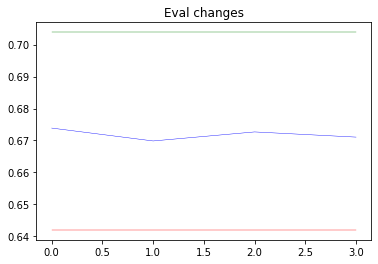

In [93]:
pbil.plot_evals()

In [117]:
pop = pbil._random_population()

In [122]:
pop[0].shape, rules.shape, pop[0].dot(rules).shape

((266,), (266, 9350), (9350,))

In [153]:
%%time
pop.dot(rules)
# for p in pop:
#     sstats.mode(rules[p], axis=0)[0][0]

CPU times: user 537 ms, sys: 3.92 ms, total: 541 ms
Wall time: 549 ms


array([[236, 248, 224, ..., 361, 366, 403],
       [241, 266, 227, ..., 357, 359, 398],
       [228, 247, 217, ..., 336, 343, 377],
       ...,
       [220, 239, 209, ..., 336, 342, 375],
       [230, 249, 228, ..., 332, 347, 377],
       [216, 237, 217, ..., 330, 341, 373]])